# Preparacion de datos

# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Importar dataset

In [2]:
df = pd.read_csv("./german_credit_risk.csv")
df.head()

,Unnamed: 0,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Most_valuable_available_asset,Age_years,Concurrent_Credits,Foreign_Worker
0,0,1,1,18,4,1049,1,2,4,2,2,21,3,1
1,1,1,1,9,4,2799,1,3,2,3,1,36,3,1
2,2,1,2,12,2,841,2,4,2,2,1,23,3,1
3,3,1,1,12,4,2122,1,3,3,3,1,39,3,2
4,4,1,1,12,4,2171,1,3,4,3,2,38,1,2


# Balance de datos

La siguiente tabla que muestra el balance de datos de la variable objetivo.

In [3]:
target = 'Creditability'
balance_data = df[target].value_counts()
pd.DataFrame(balance_data)

,count
Creditability,
1,700
0,300


Para visualizar el conteo de una manera mas facil, se utliza una grafica de baras.

<Axes: xlabel='Creditability', ylabel='Count'>

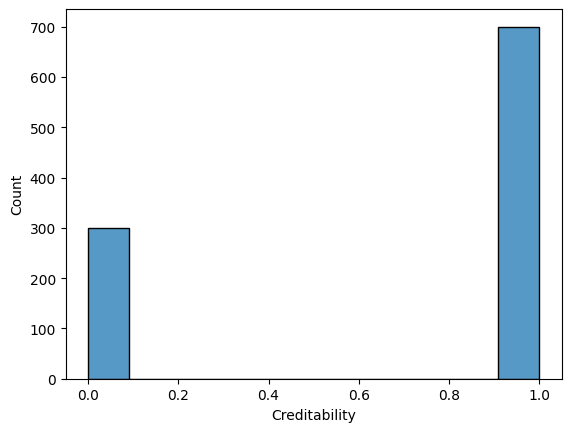

In [4]:
sns.histplot(data = df, x = target)

El dataset no esta balenceado!

# Undersampling technique

In [41]:
num_samples = df[target].value_counts(normalize = False)
min_samples = int(num_samples.min())
min_target = int(num_samples.idxmin())
print("Numero de muestras: \n", num_samples)
print('Numero minino de ejemplos: ', min_samples)
print('Etiqueta de la categoria: ', min_target)

Numero de muestras: 
 Creditability
1    700
0    300
Name: count, dtype: int64
Numero minino de ejemplos:  300
Etiqueta de la categoria:  0


Se define una estrategia de submuestreo para reducir el numero de ejemplos las demas categorias a la categoria con menor numero de ejemplos.

In [42]:
undersampling_strategy = {i: min_samples for i in range(len(num_samples)) if i != min_target}
display(undersampling_strategy)

{1: 300}

Definimos los datos entre caracteristicas `X` y variable objetivo `y`.

In [43]:
X = df.drop([target], axis = 1)
y = df[target]

Mediante la funcion `undersampling()` se reduce en numero de ejemplos y retorna el un dataframe con el dataset balanceado.

In [44]:
def undersampling(X, y, undersampling_strategy):
    under = RandomUnderSampler(sampling_strategy = undersampling_strategy,  random_state = 42)
    under_X, under_y = under.fit_resample(X, y)
    under_df = pd.concat([under_X, under_y], axis = 1) 
    return under_df

In [45]:
balanced_df = undersampling(X, y, undersampling_strategy)
balanced_df.head()

,Unnamed: 0,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Most_valuable_available_asset,Age_years,Concurrent_Credits,Foreign_Worker,Creditability
0,22,2,36,2,2384,1,2,4,3,4,33,3,1,0
1,45,1,18,2,1216,1,2,4,2,3,23,3,1,0
2,47,4,18,4,1864,2,3,4,2,1,30,3,1,0
3,97,2,36,3,4455,1,3,2,1,1,30,2,1,0
4,110,1,15,2,3959,1,3,3,2,2,29,3,1,0


# Train test split

In [46]:
# Variable objetivo
y = balanced_df[target]
# datos
X = balanced_df.drop([target], axis = 1)
# particion del dataset en datos de entrenamiento y prueba en la proporcion 70-30, respectivamente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Guardar dataset

In [47]:
X_train.to_csv('X_train.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
y_test.to_csv('y_test.csv', index = False)